<h1 style="background: linear-gradient(135deg, #F7B2B0, #FFD2C5);
            -webkit-background-clip: text;
            -webkit-text-fill-color: transparent;
            font-family: 'Arial Black', sans-serif;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
            text-align: center;
            background-color: #FF5252;
            padding: 10px;
            display: inline-block;
            border-radius: 10px;
            box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);
            backdrop-filter: blur(5px);
            margin: 20px;">FETAL HEALTH</h1>
 
 
Cardiotocography (CTG) is a monitoring technique used during pregnancy to track the **fetal heart rate** and **uterine contractions**. It helps assess the well-being of the fetus and identify signs of potential distress early on.

The interpretation of CTG results is crucial for **determining the risk level of a pregnancy**. If the CTG shows abnormalities, further investigations and interventions may be necessary to **ensure the health and safety of both the mother and the baby**.

In this project, we aim to develop a model that can **classify the outcomes of the Cardiotocogram test** accurately. The goal is to provide a reliable system that promotes the well-being of the fetus, utilizing advanced technology to support **better decision-making in prenatal care**.

<h1 style="background: linear-gradient(135deg, #F7B2B0, #FFD2C5);
            -webkit-background-clip: text;
            -webkit-text-fill-color: transparent;
            font-family: 'Arial Black', sans-serif;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
            text-align: center;
            background-color: #FF5252;
            padding: 10px;
            display: inline-block;
            border-radius: 10px;
            box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);
            backdrop-filter: blur(5px);
            margin: 20px;">TABLE OF CONTENTS</h1>

**IMPORTING LIBRARIES**

**DATA LOADING**

**DATA PREPROCESSING**

**DATA ANALYSIS**

**MODEL TRAINING AND SELECTION**

**CONCLUSIONS**

<h1 style="background: linear-gradient(135deg, #F7B2B0, #FFD2C5);
            -webkit-background-clip: text;
            -webkit-text-fill-color: transparent;
            font-family: 'Arial Black', sans-serif;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
            text-align: center;
            background-color: #FF5252;
            padding: 10px;
            display: inline-block;
            border-radius: 10px;
            box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);
            backdrop-filter: blur(5px);
            margin: 20px;">IMPORTING LIBRARIES</h1>

In [4]:
# Importing Libraries
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn.metrics import roc_curve, auc, roc_auc_score
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

np.random.seed(0)

<h1 style="background: linear-gradient(135deg, #F7B2B0, #FFD2C5);
            -webkit-background-clip: text;
            -webkit-text-fill-color: transparent;
            font-family: 'Arial Black', sans-serif;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
            text-align: center;
            background-color: #FF5252;
            padding: 10px;
            display: inline-block;
            border-radius: 10px;
            box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);
            backdrop-filter: blur(5px);
            margin: 20px;">DATA LOADING</h1>

In [5]:
data = pd.read_csv("C:/Users/ingzh/ML Project/fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
# Provide an overview of the column names, non-null value counts, and data types of the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
# The statistics computed include count, mean, standard deviation, minimum value, quartiles (25%, 50%, 75%), and maximum valu
# The .T at the end of the code transposes the resulting DataFrame. 
# This converts the columns into rows and rows into columns, making it easier to read the summary statistics.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


# On This Dataset

**Cardiotocograms (CTGs)** are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes:

1. Normal
2. Suspect
3. Pathological

**Features**

**baseline value** - FHR baseline (beats per minute): The baseline fetal heart rate provides information about the overall health of the fetus. Abnormalities in the baseline value can indicate potential issues with fetal health.

**accelerations** - Number of accelerations per second: Accelerations are increases in the fetal heart rate and are considered a positive sign of fetal well-being. A higher number of accelerations generally indicates a healthier fetus.

**fetal_movement** - Number of fetal movements per second: Fetal movements reflect the responsiveness and activity level of the fetus. A higher number of movements may indicate a more active and healthy fetus.

**uterine_contractions** - Number of uterine contractions per second: Uterine contractions represent the activity of the mother's uterus. Excessive or abnormal contractions can affect fetal oxygen supply, potentially impacting fetal health.

**light_decelerations** - Number of light decelerations per second: Decelerations are temporary decreases in the fetal heart rate. Light decelerations can occur during fetal movement and are generally not a cause for concern unless they are persistent or severe.

**severe_decelerations** - Number of severe decelerations per second: Severe decelerations are significant and prolonged decreases in the fetal heart rate. They may indicate reduced oxygen supply to the fetus and can be associated with fetal distress or pathology.

**prolongued_decelerations** - Number of prolonged decelerations per second: Prolonged decelerations are decelerations that last longer than normal. They can be indicative of fetal distress or reduced oxygen supply.

**abnormal_short_term_variability** - Percentage of time with abnormal short-term variability: Short-term variability refers to the fluctuations in the fetal heart rate from beat to beat. Abnormalities in short-term variability can suggest fetal distress or an underlying health issue.

**mean_value_of_short_term_variability** - Mean value of short-term variability: The mean value of short-term variability provides information about the average level of fluctuation in the fetal heart rate. Changes in this measure can indicate changes in fetal health.

**percentage_of_time_with_abnormal_long_term_variability** - Percentage of time with abnormal long-term variability: Long-term variability refers to the variability in the baseline fetal heart rate over a longer time period. Abnormal long-term variability can be a sign of fetal distress or compromised fetal health.

**mean_value_of_long_term_variability** - Mean value of long-term variability: The mean value of long-term variability represents the average amount of fluctuation in the baseline fetal heart rate over time. Changes in this measure can indicate changes in fetal health.

**histogram_width** - Width of FHR histogram: The width of the fetal heart rate histogram reflects the range of heart rate values. A wider histogram may indicate greater variability in the fetal heart rate, which is generally associated with a healthier fetus.

**histogram_min** - Minimum (low frequency) of FHR histogram: The minimum value of the fetal heart rate histogram represents the lowest heart rate recorded. Extreme low values may suggest fetal distress or compromised health.

**histogram_max** - Maximum (high frequency) of FHR histogram: The maximum value of the fetal heart rate histogram represents the highest heart rate recorded. Extreme high values may indicate fetal distress or other health issues.

**histogram_number_of_peaks** - Number of histogram peaks: The number of peaks in the fetal heart rate histogram indicates the frequency of heart rate fluctuations. A higher number of peaks may indicate a healthier and more responsive fetus.

**histogram_number_of_zeroes** - Number of histogram zeros: The number of zeros in the fetal heart rate histogram represents the periods of absent or minimal heart rate variability. Increased numbers of zeros can indicate fetal distress or compromised health.

**histogram_mode** - Histogram mode: The mode of the fetal heart rate histogram represents the most frequently occurring heart rate value. Changes in the mode can indicate shifts in the dominant

* **Target**
* **'fetal_health'** Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

<h1 style="background: linear-gradient(135deg, #F7B2B0, #FFD2C5);
            -webkit-background-clip: text;
            -webkit-text-fill-color: transparent;
            font-family: 'Arial Black', sans-serif;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
            text-align: center;
            background-color: #FF5252;
            padding: 10px;
            display: inline-block;
            border-radius: 10px;
            box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);
            backdrop-filter: blur(5px);
            margin: 20px;">DATA ANALYSIS</h1>

**The analysis consist of:**
* Count Plot
* Corelation Heat Map
* Implot
* Swarm And Boxen Plot


<Axes: xlabel='fetal_health', ylabel='count'>

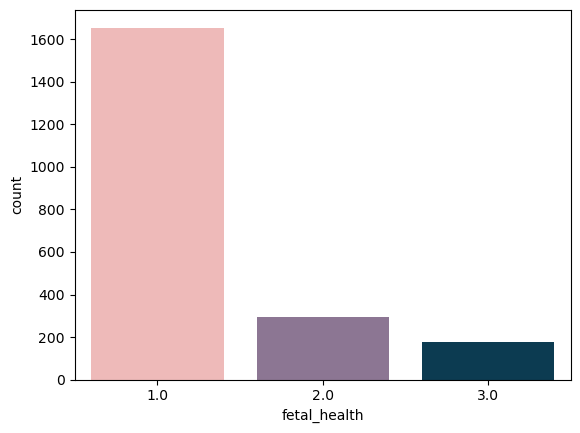

In [8]:
#First of all let us evaluate the target and find out if our data is imbalanced or not

# Define a color palette for the countplot
colours = ["#f7b2b0", "#8f7198", "#003f5c"]

# Create a countplot to visualize the distribution of the target variable
sns.countplot(data=data, x="fetal_health", palette=colours)

The count plot of the target variable indicates an **imbalance** in the data, which can potentially lead to misleading classification accuracy. In such cases, it is important to consider performance measures that provide better insights into the model's performance.

To gain a more comprehensive understanding of the classification results, the following performance measures are commonly used:
- **Confusion Matrix**: A table that summarizes the predictions of a classification model, showing the true positives, true negatives, false positives, and false negatives. It provides a detailed breakdown of the model's performance.
- **Precision**: Also known as positive predictive value, it measures the accuracy of positive predictions. It represents the proportion of correctly predicted positive instances out of the total predicted positive instances.
- **Recall**: Also known as sensitivity or true positive rate, it measures the proportion of actual positive instances that are correctly predicted by the model.
- **F1 Score**: A balanced measure that combines precision and recall. It provides a single metric that balances both measures and is useful in scenarios where there is an imbalance between classes.

In addition to these performance measures, it is also valuable to evaluate the **correlation matrix** to understand the relationships between different features in the dataset.

To calculate and visualize the correlation matrix, we use the following code:

<Axes: >

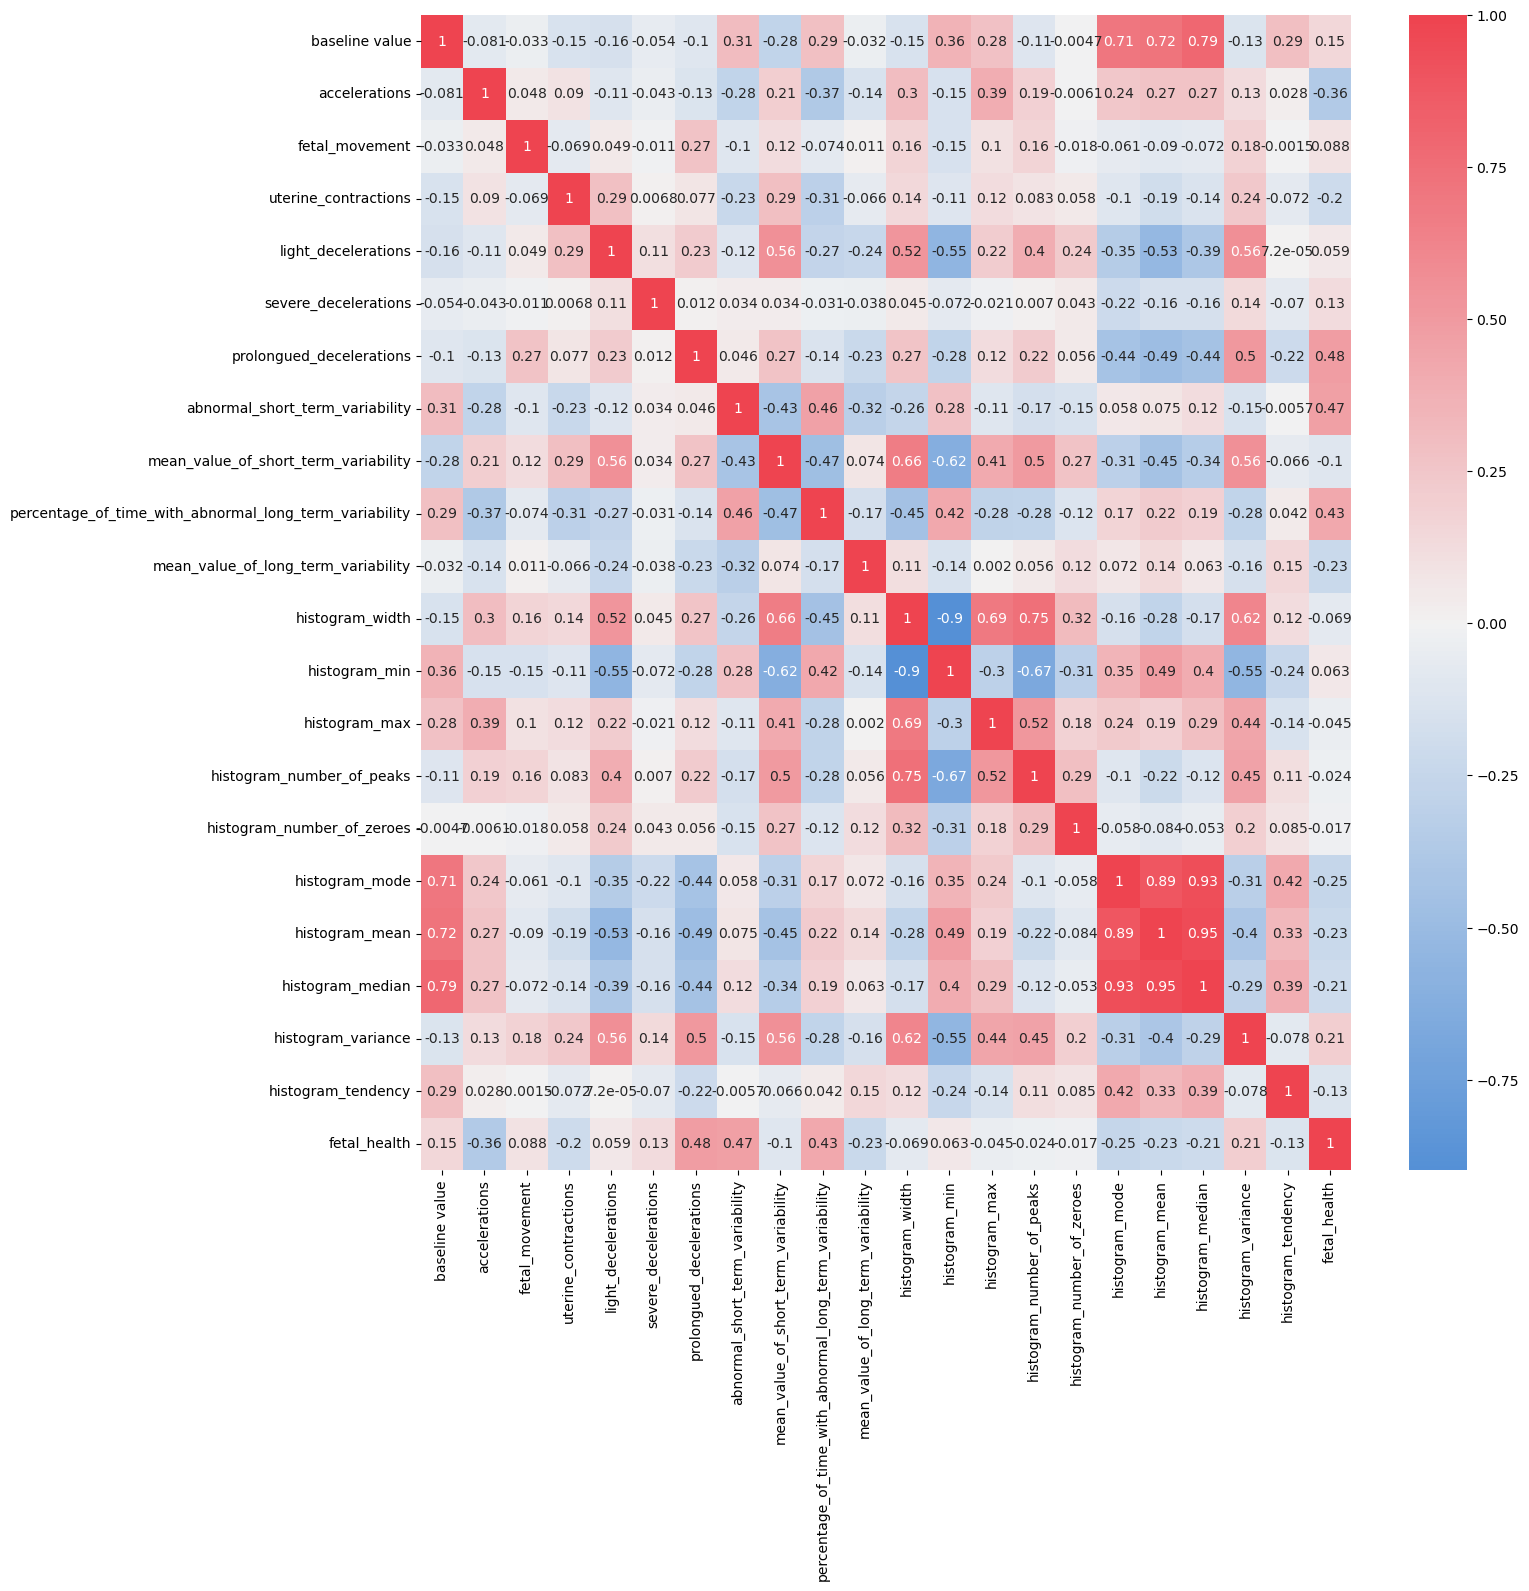

In [9]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Based on the correlation matix, it is clear that "accelerations","prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" and "mean_value_of_long_term_variability" are the features with higher correlation with fetal_health. Let's have a closer look at these with fetal_movement on y axis. This will provide a clearer picture of trends that indicate fetus health. 

**Accelerations Vs Fetal Movement by Fetal Health**

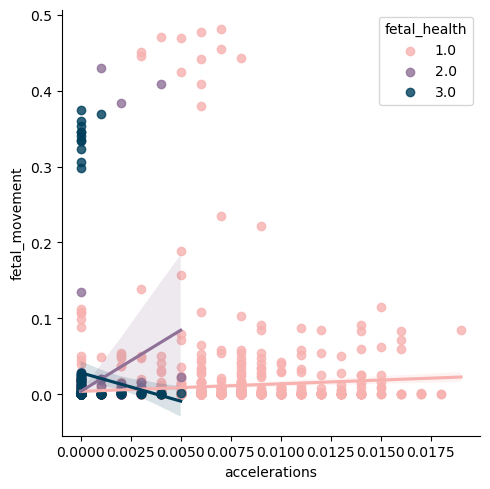

In [10]:
sns.lmplot(data =data,x="accelerations",y="fetal_movement",palette=colours, hue="fetal_health",facet_kws={"legend_out": False})
plt.show()

**Prolongued Decelerations Vs Fetal Movement by Fetal Health**

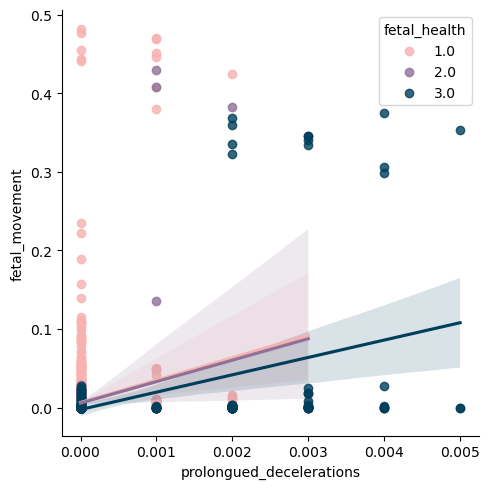

In [11]:
sns.lmplot(data =data,x="prolongued_decelerations",y="fetal_movement",palette=colours, hue="fetal_health",facet_kws={"legend_out": False})
plt.show()

**Abnormal Short Term Variability Vs Fetal Movement by Fetal Health**

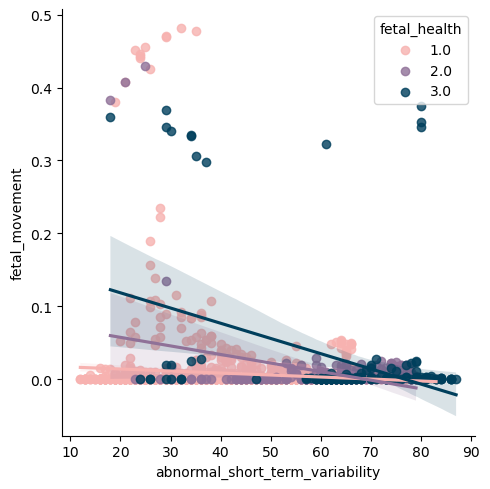

In [12]:
sns.lmplot(data =data,x="abnormal_short_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",facet_kws={"legend_out": False})
plt.show()

**Percentage of Time of Long Term Variability Vs Fetal Movement by Fetal Health**

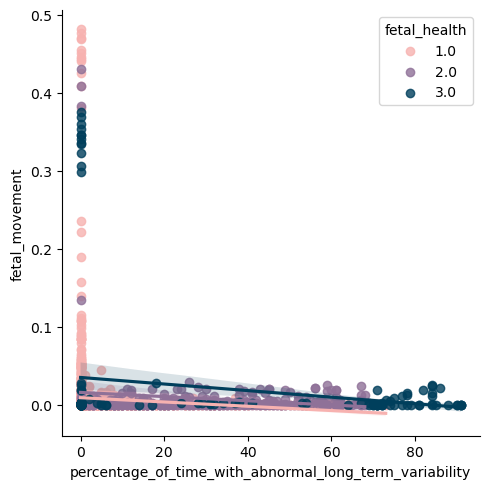

In [13]:
sns.lmplot(data =data,x="percentage_of_time_with_abnormal_long_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",facet_kws={"legend_out": False})
plt.show()

**Mean Value Of Long Term Variability Vs Fetal Movement by Fetal Health**

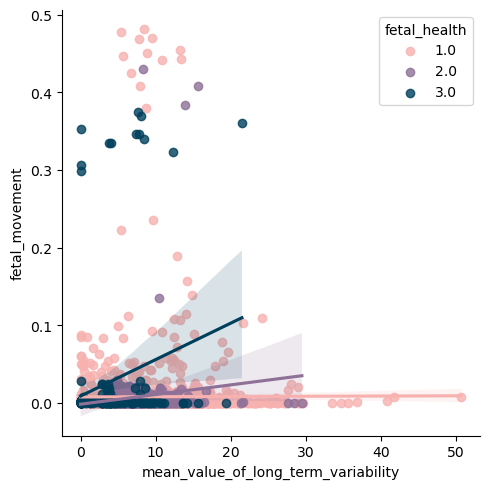

In [14]:
sns.lmplot(data =data,x="mean_value_of_long_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",facet_kws={"legend_out": False})
plt.show()

We have observed that the rates of change for the selected features exhibit distinct trends corresponding to each target class. Additionally, we have identified the presence of outliers within the data. To further analyze these outliers, we will employ box plots, which offer a concise and effective way to visualize their distribution

In [15]:
# columns for detailed visualisation
cols=['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']

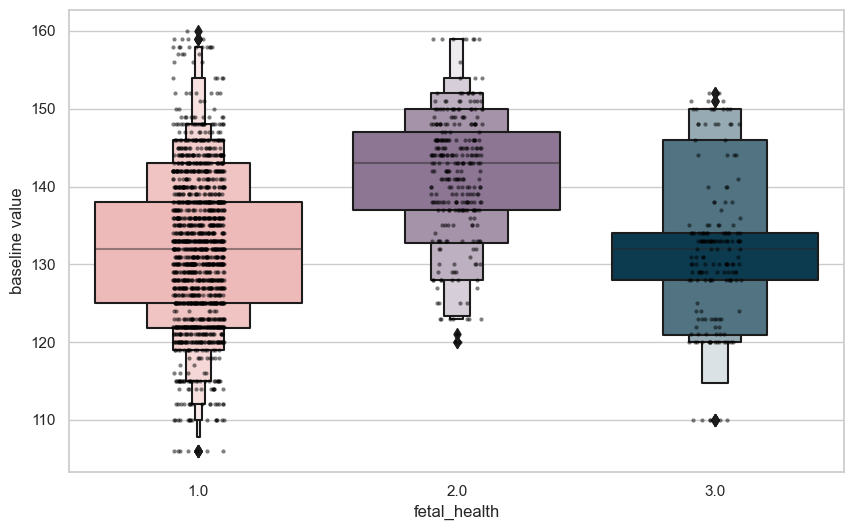

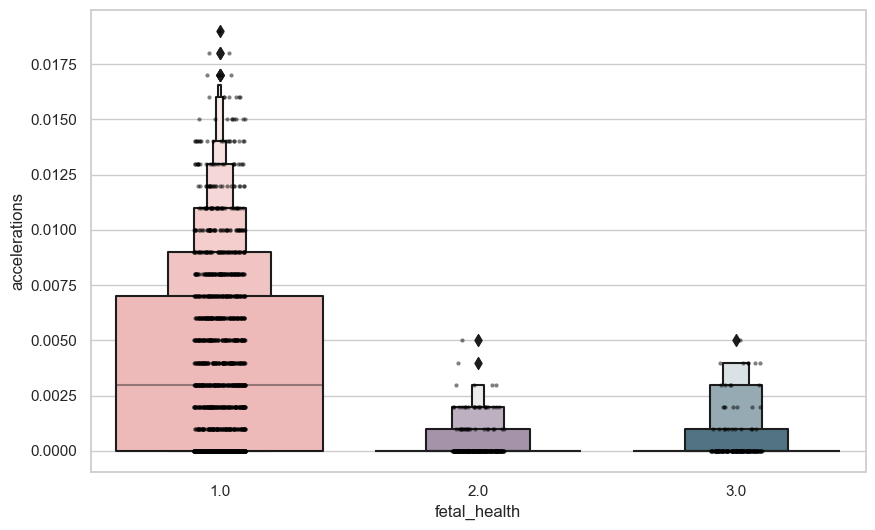

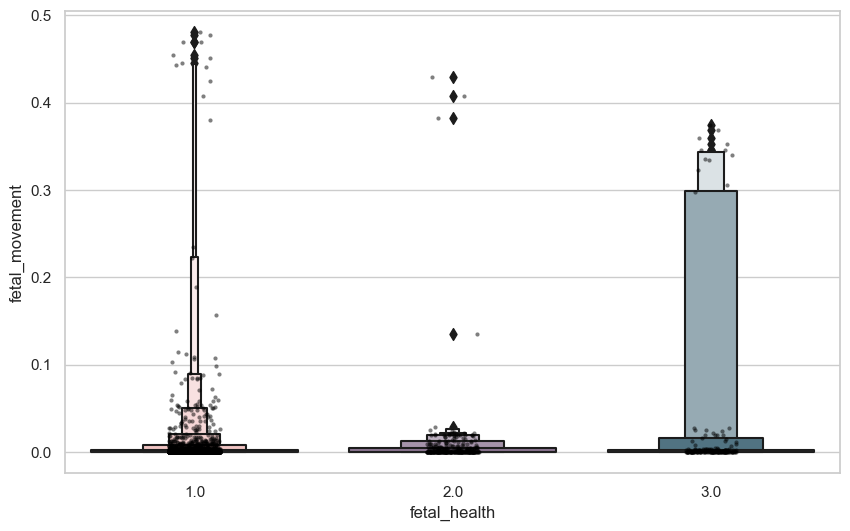

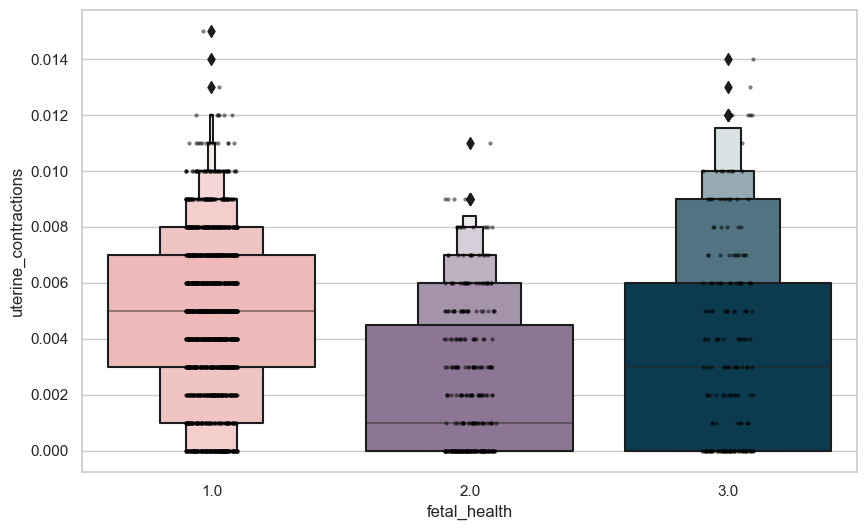

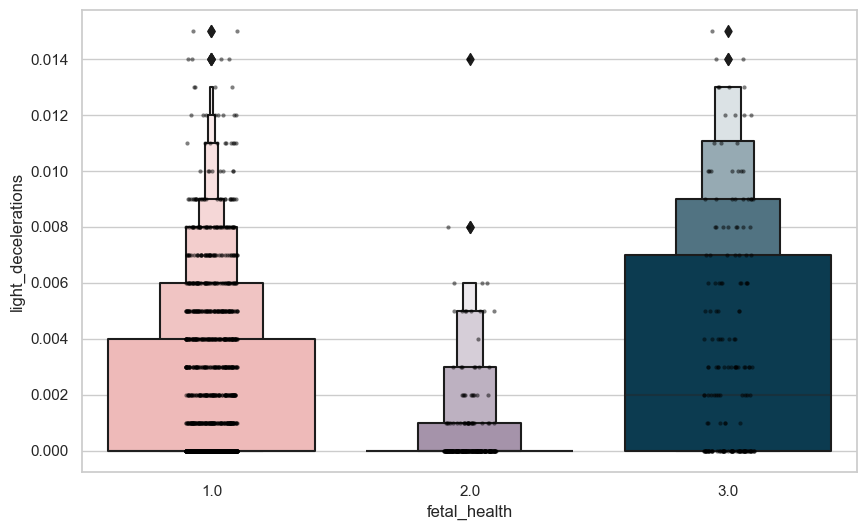

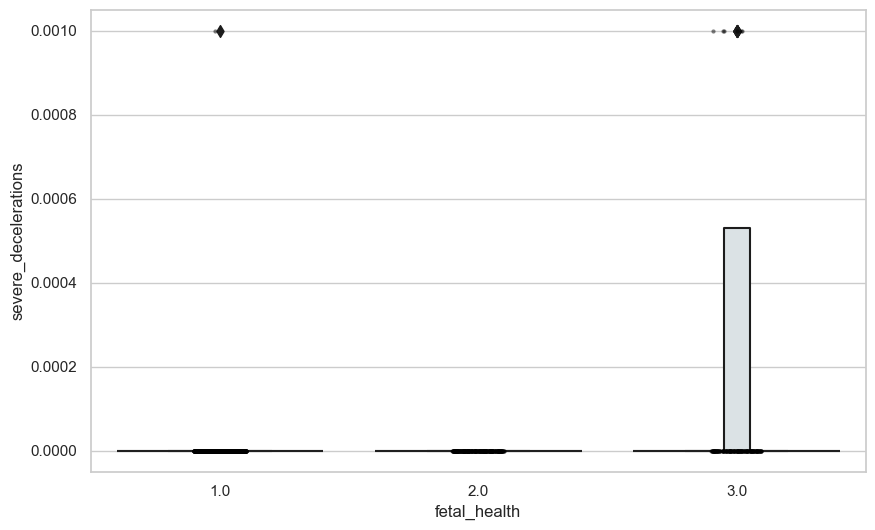

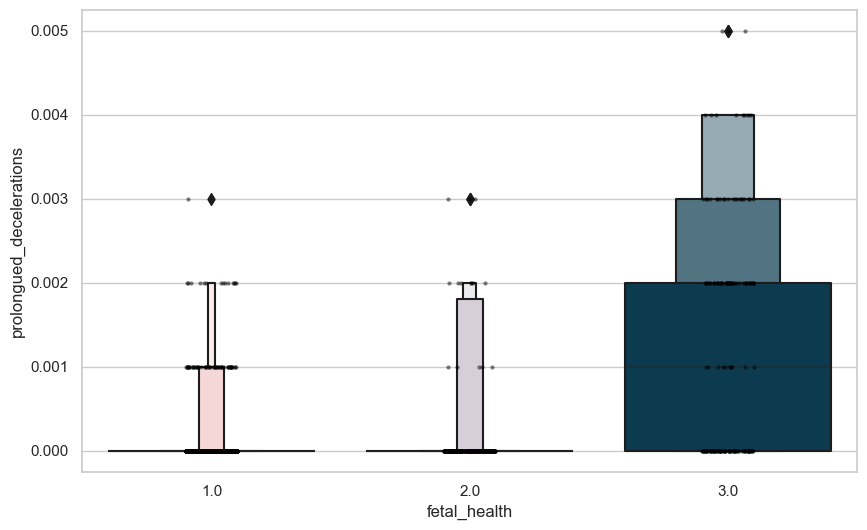

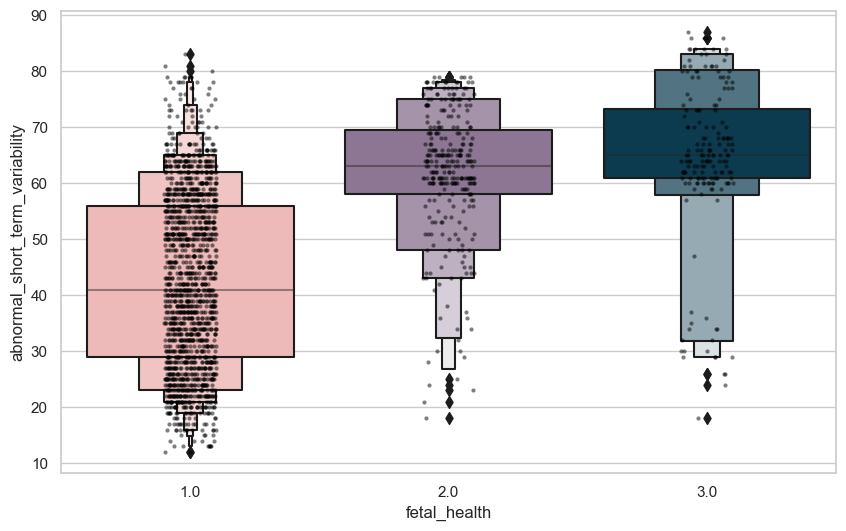

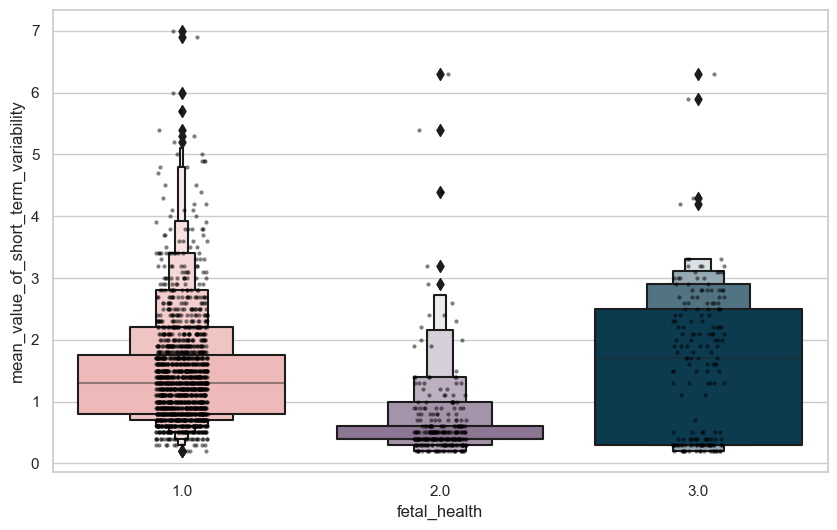

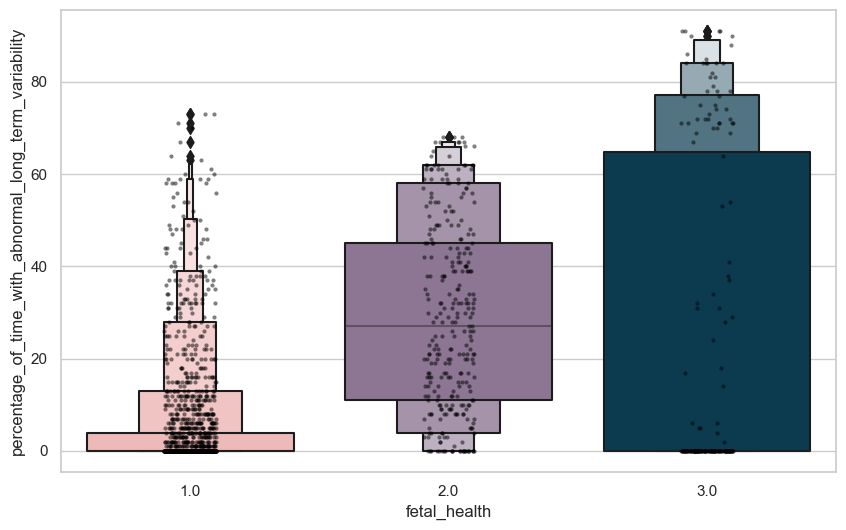

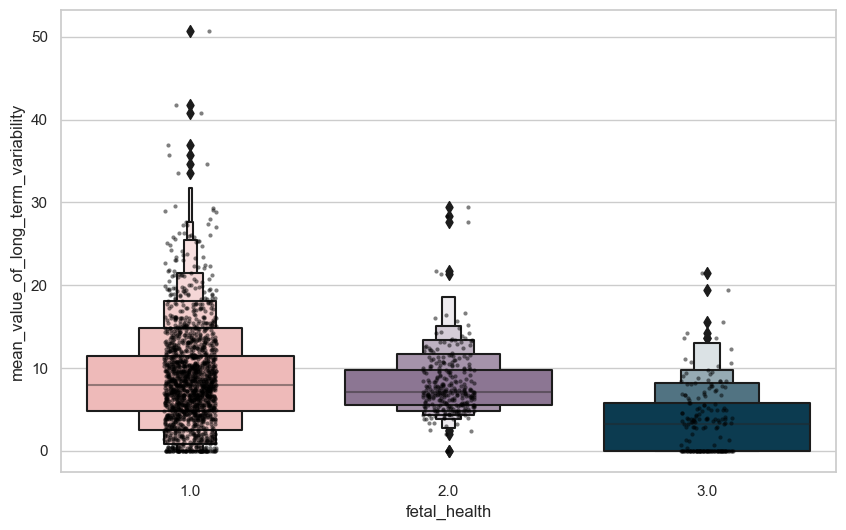

In [17]:
cols = ['baseline value', 'accelerations', 'fetal_movement',
        'uterine_contractions', 'light_decelerations', 'severe_decelerations',
        'prolongued_decelerations', 'abnormal_short_term_variability',
        'mean_value_of_short_term_variability',
        'percentage_of_time_with_abnormal_long_term_variability',
        'mean_value_of_long_term_variability']

sns.set(style="whitegrid")

for i in cols:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.stripplot(ax=ax, x=data["fetal_health"], y=data[i], color="black", alpha=0.5, size=3)
    sns.boxenplot(ax=ax, x=data["fetal_health"], y=data[i], palette=colours)
    ax.set_xlabel("fetal_health")
    ax.set_ylabel(i)
    plt.show()

We have identified outliers in our dataset, but it is not advisable to remove them immediately due to the risk of overfitting. Although removing outliers may improve statistical measures, it is important to consider the following rule of thumb when dealing with outliers:

**Measurement or Data Entry Errors**: If an outlier is a result of a measurement or data entry error, it can be corrected or removed. However, in our case, the dataset comprises outcomes from CTG reports, which are unlikely to have data entry errors.

**Relevance to the Studied Population**: Outliers can be legitimately removed if they do not belong to the population under study. However, in the context of fetal health classification, these outliers represent natural variations within the population. They have been classified by experts, and it is important to respect their professional judgment.

Therefore, it is recommended to keep the outliers in our dataset, aligning with expert opinion, and ensuring a comprehensive analysis that encompasses the full range of observations and potential variations in fetal health.

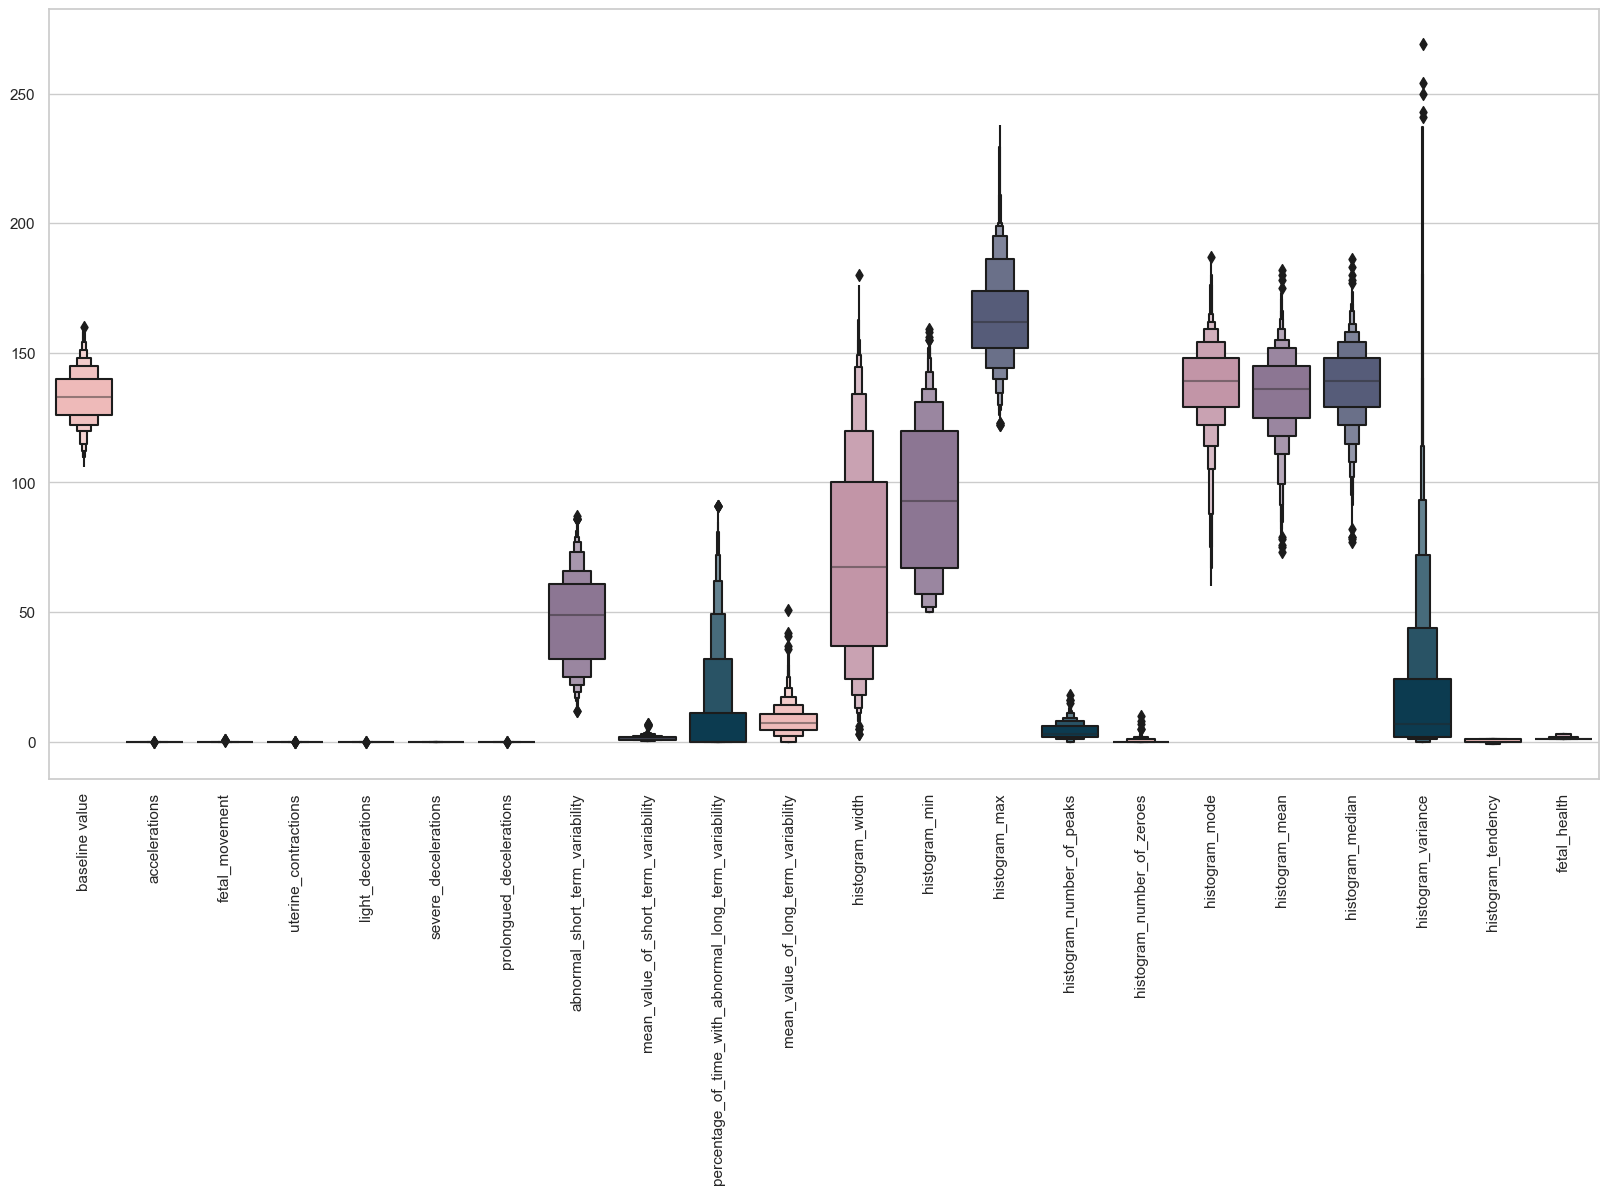

In [18]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = data,palette = shades)
plt.xticks(rotation=90)
plt.show()

The above plot shows the range of our feature attributes. All the features are in different ranges. To fit this in a model we must scale it to the same range.

In the model building, we will preprocess the features to do the same.

<h1 style="background: linear-gradient(135deg, #F7B2B0, #FFD2C5);
            -webkit-background-clip: text;
            -webkit-text-fill-color: transparent;
            font-family: 'Arial Black', sans-serif;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
            text-align: center;
            background-color: #FF5252;
            padding: 10px;
            display: inline-block;
            border-radius: 10px;
            box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);
            backdrop-filter: blur(5px);
            margin: 20px;">MODEL TRAINING AND SELECTION</h1>
            
In this section we will:
* Set up features(X) and target(Y)
* Scale the features
* Split training and test sets 
* Model selection
* Hyperparameter tuning

In [19]:
#assigning values to features as X and target as y
X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-4.010589e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


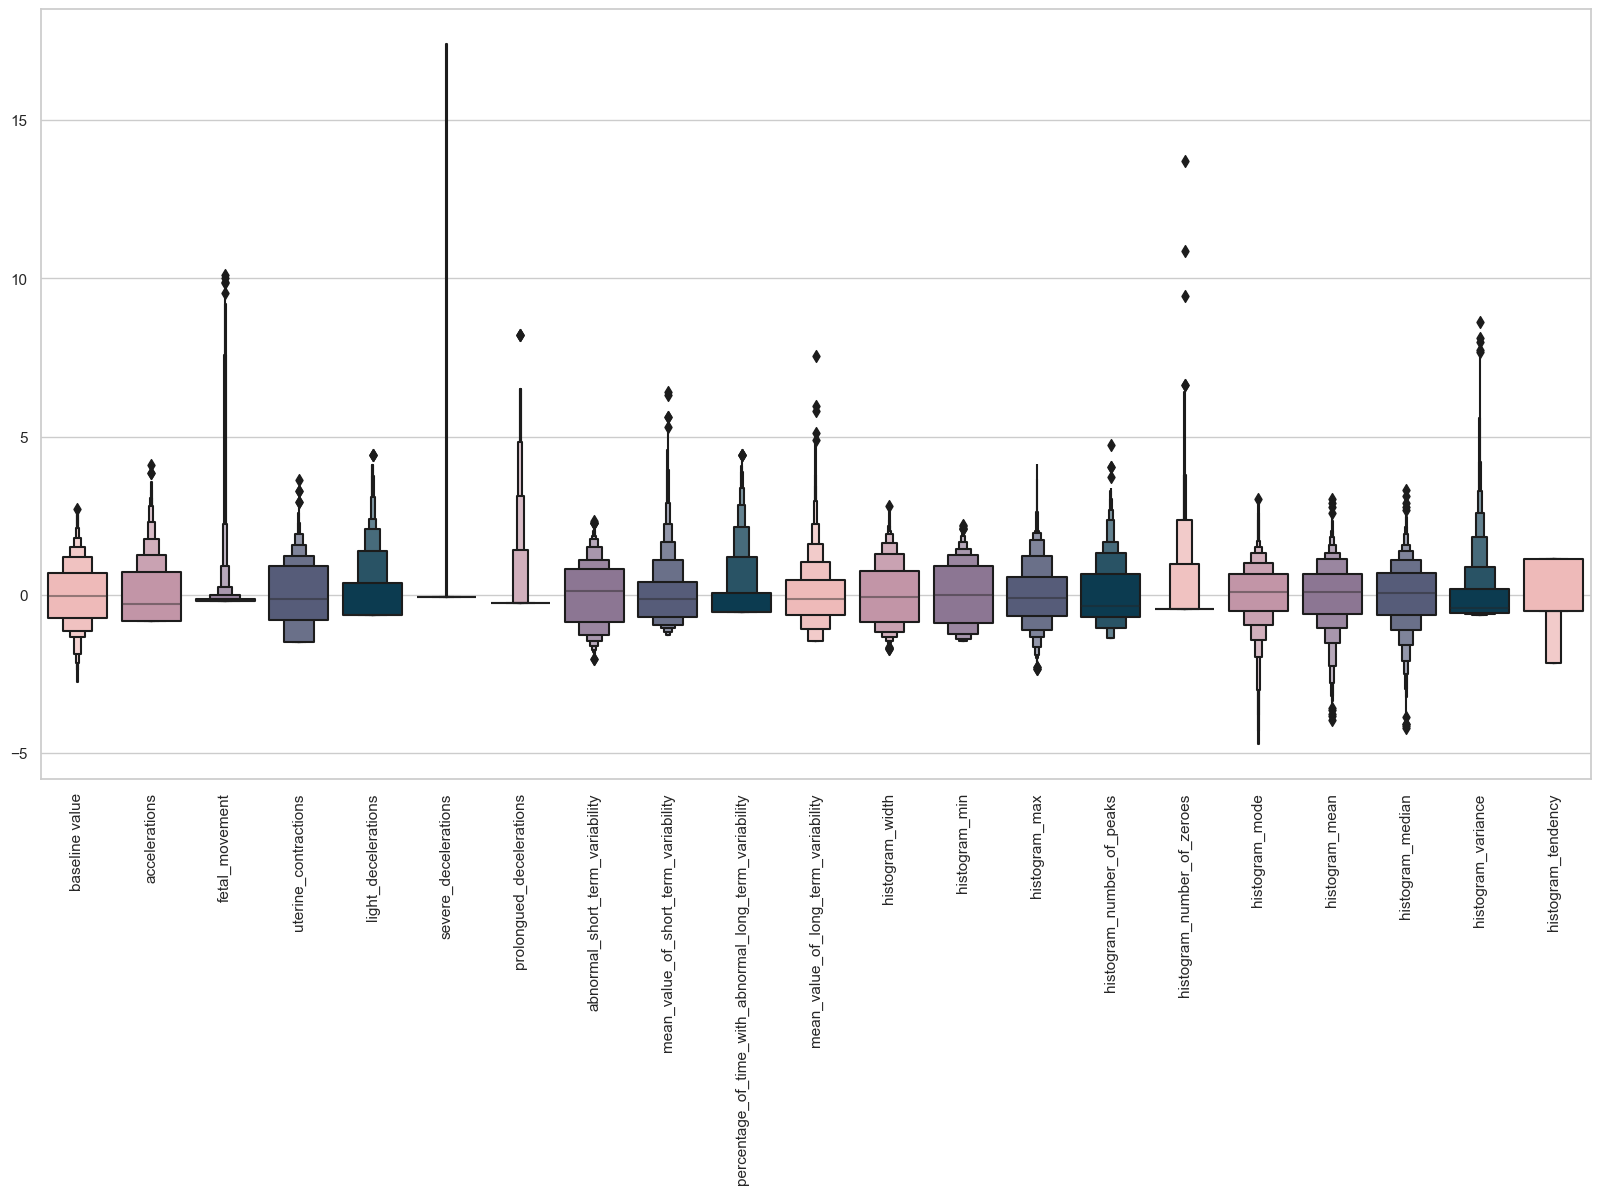

In [20]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

In [21]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

The **training data** is used to train your machine learning model.
It typically consists of a significant portion of your dataset (e.g., 70-80%).
The model learns patterns, relationships, and trends from this data.

The **test data** is used to evaluate the performance of your trained model.
It acts as a proxy for unseen data, simulating real-world scenarios.
It helps measure how well your model generalizes to new, unseen examples.
It should not be used during the training phase to prevent model overfitting.

In [22]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.897170 
Decision Tree: 0.916683 
RandomForest: 0.938858 
SVC: 0.906594 


So Random Forest does best among the models to be the most accurate. Let us build a better random forest with grid search cv.
Let's find out how it performs on testset

In [23]:
#taking look at the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.9420062695924765


In [26]:
#Building a dictionary with list of optional values that will be analysed by GridSearch CV
parameters = { 
    'n_estimators': [100, 500, 900],
    'max_features': ['sqrt'],
    'max_depth' : [4, 12, 16],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1]
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=5, n_jobs=-1)

from sklearn.model_selection import RandomizedSearchCV

CV_rfc = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=parameters, n_iter=10, cv=5, n_jobs=-1)

subset_X_train = X_train[:1000]
subset_y_train = y_train[:1000]

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=5)
CV_rfc.fit(subset_X_train, subset_y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 12, 16], 'max_features': ['sqrt'],
                         'n_estimators': [100, 500, 900], 'n_jobs': [-1]})

In [27]:
RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_train, y_train)

# Testing the Model on the test set
predictions = RF_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)


********* Random Forest Results *********
Accuracy    :  0.9435736677115988
Recall      :  0.9435736677115988
Precision   :  0.9427814501839988
F1 Score    :  0.9435736677115988


In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       496
         2.0       0.90      0.78      0.84       101
         3.0       0.86      0.93      0.89        41

    accuracy                           0.94       638
   macro avg       0.91      0.90      0.90       638
weighted avg       0.94      0.94      0.94       638



<Axes: >

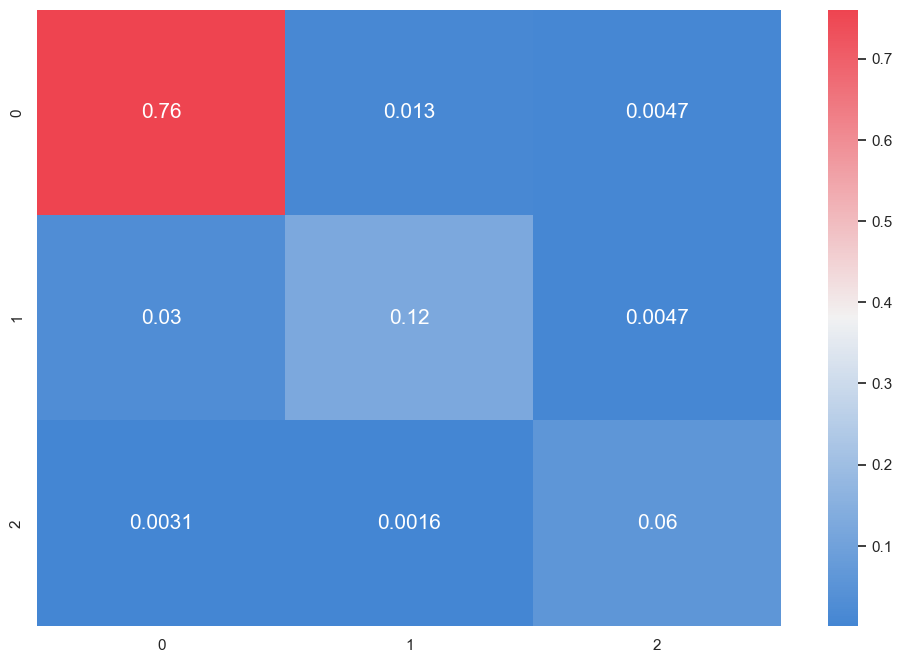

In [29]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})



<a id="5"></a> 
# <h1 style='background:#f7b2b0; border:0; color:black'><center>END</center></h1> 